## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Exploring data columns
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.dtypes.value_counts()

object     10
int64       8
float64     8
dtype: int64

In [6]:
# Checking null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# Check duplicates
df.duplicated().sum()

0

In [8]:
categorical_col = [feature for feature in df.columns if df[feature].dtypes=='O']
categorical_col

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [9]:
df[categorical_col]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [10]:
numerical_col = [feature for feature in df.columns if df[feature].dtypes!='O']
numerical_col

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [11]:
df[numerical_col]

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [12]:
# Let's modify CarName column to show only car brand 
df['Brand'] = df['CarName'].str.split(' ').str.get(0).str.lower()
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [13]:
# drop some columns
df.drop(['car_ID','symboling','CarName'],axis=1,inplace=True)

## EDA

C:\Users\midon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Care price distribution')

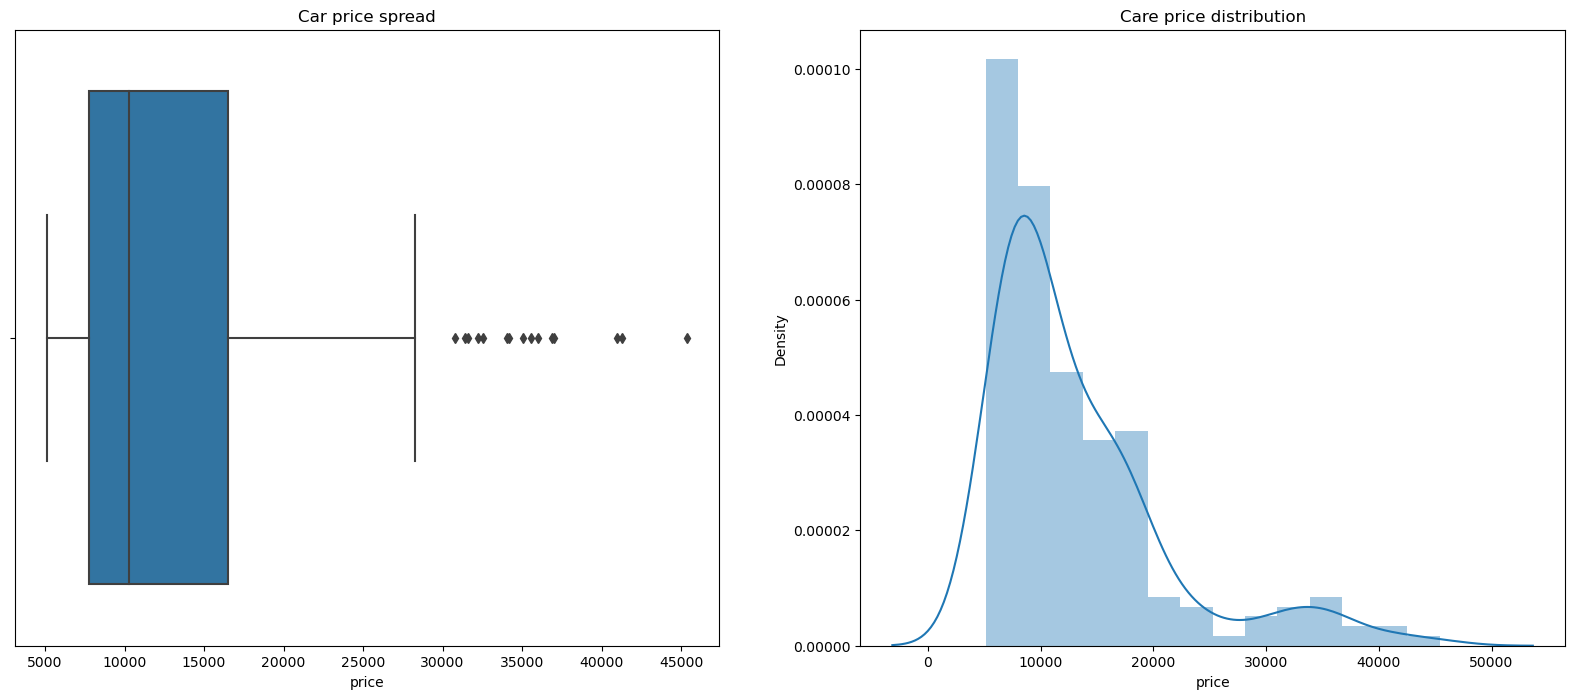

In [16]:
# Let's see the distribution of our target column (price)
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.boxplot(data=df,x='price')
plt.title('Car price spread')

plt.subplot(1,2,2)
sns.distplot(df['price'],hist=True,kde=True)
plt.title('Care price distribution')

In [20]:
df['price'].describe(percentiles=[0.25,0.5,0.75,.85,0.9,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

> From price Distribution:

1) Price distribution is right skewed.

2) Most of data points are so far spread out from the mean,which indicates high variance in car prices (for example,75% of prices are below 16503, whereas the remaining are between 16503 and 45400).


### Categorical Features

In [24]:
categorical_col = [feature for feature in df.columns if df[feature].dtypes=='O']
categorical_col

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'Brand']

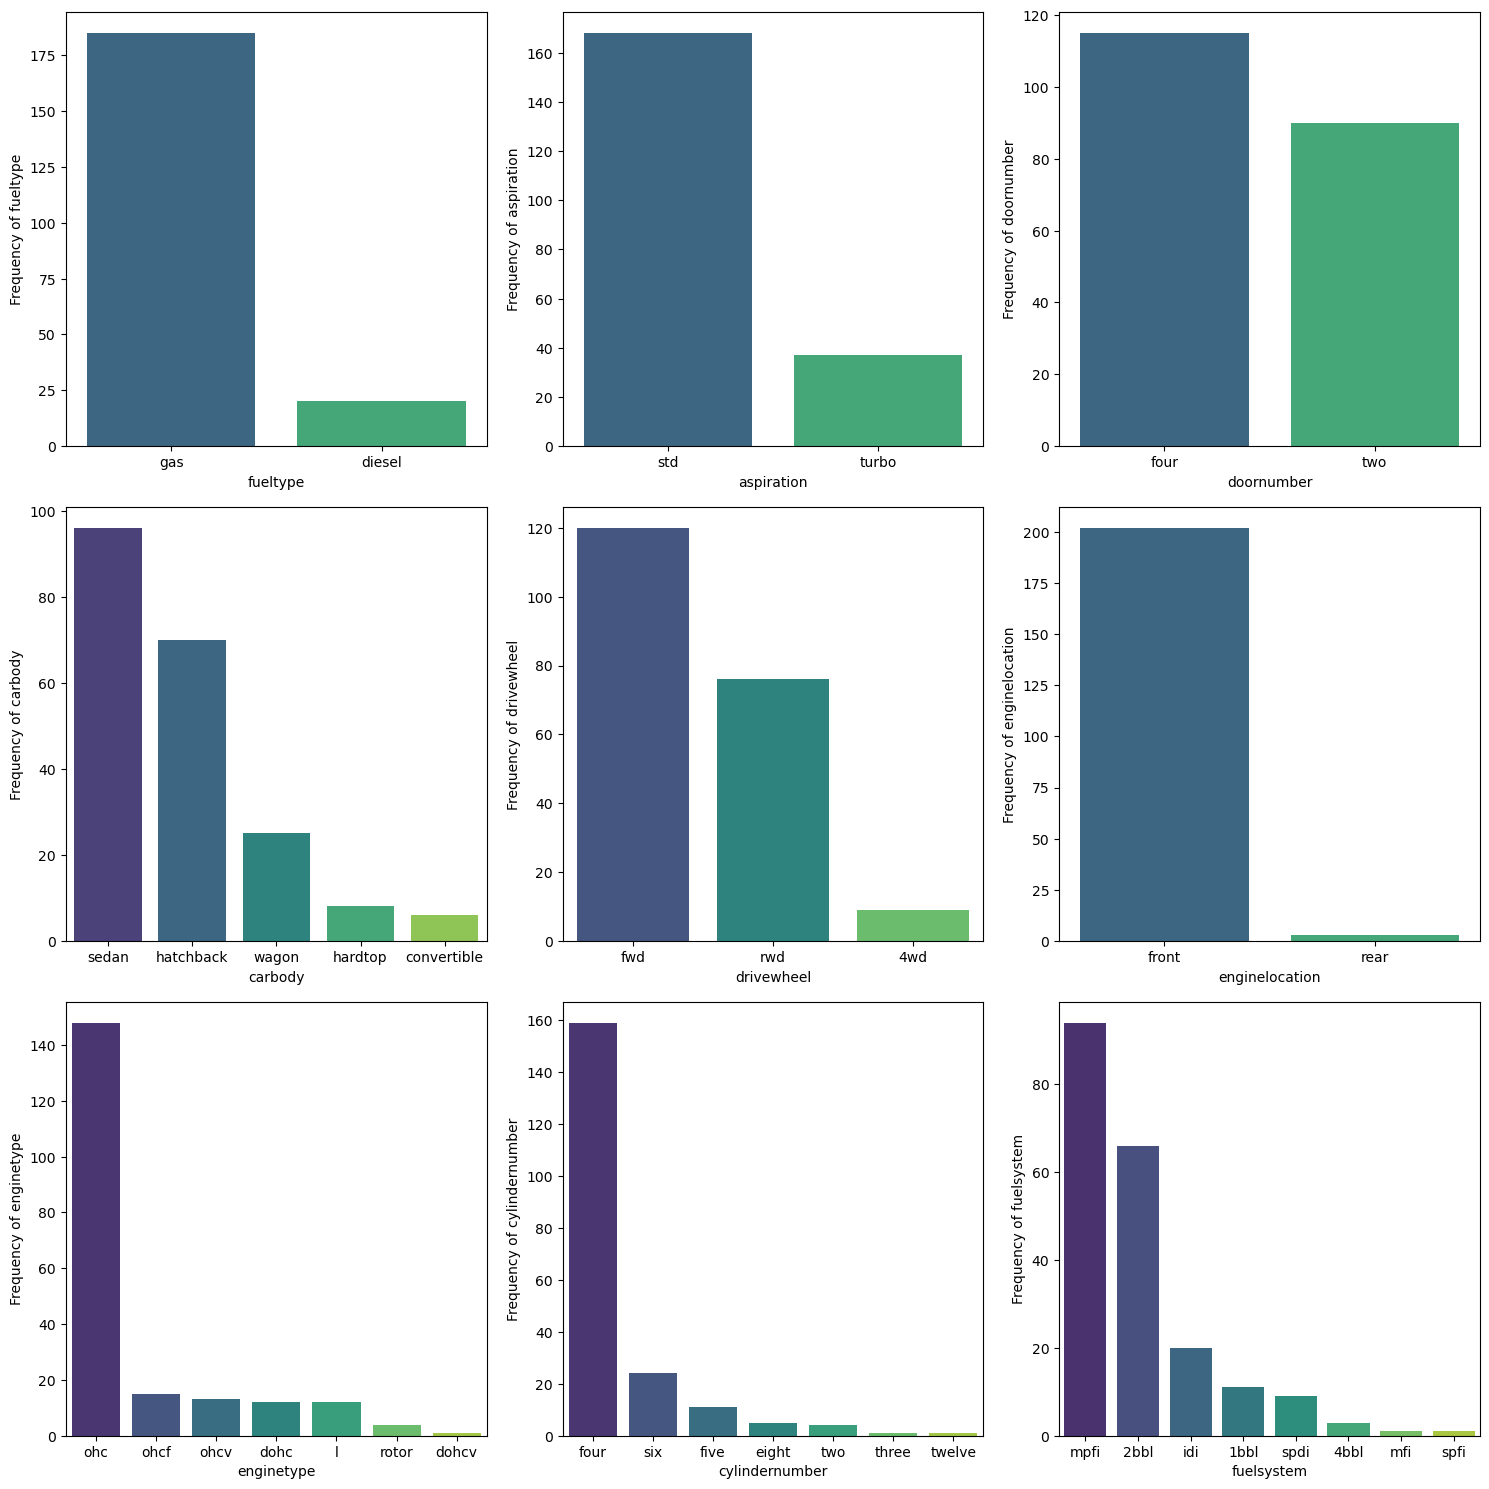

In [44]:
fig, axes = plt.subplots(3,3,figsize=(15,15))
axes = axes.flatten()
for i,col in enumerate(categorical_col):
    if col != 'Brand':
        sns.countplot(data=df,x=col,palette='viridis',order=df[col].value_counts().index,ax=axes[i])
        axes[i].set_ylabel('Frequency of {}'.format(col))
plt.tight_layout()
plt.show()

<Axes: xlabel='Brand', ylabel='count'>

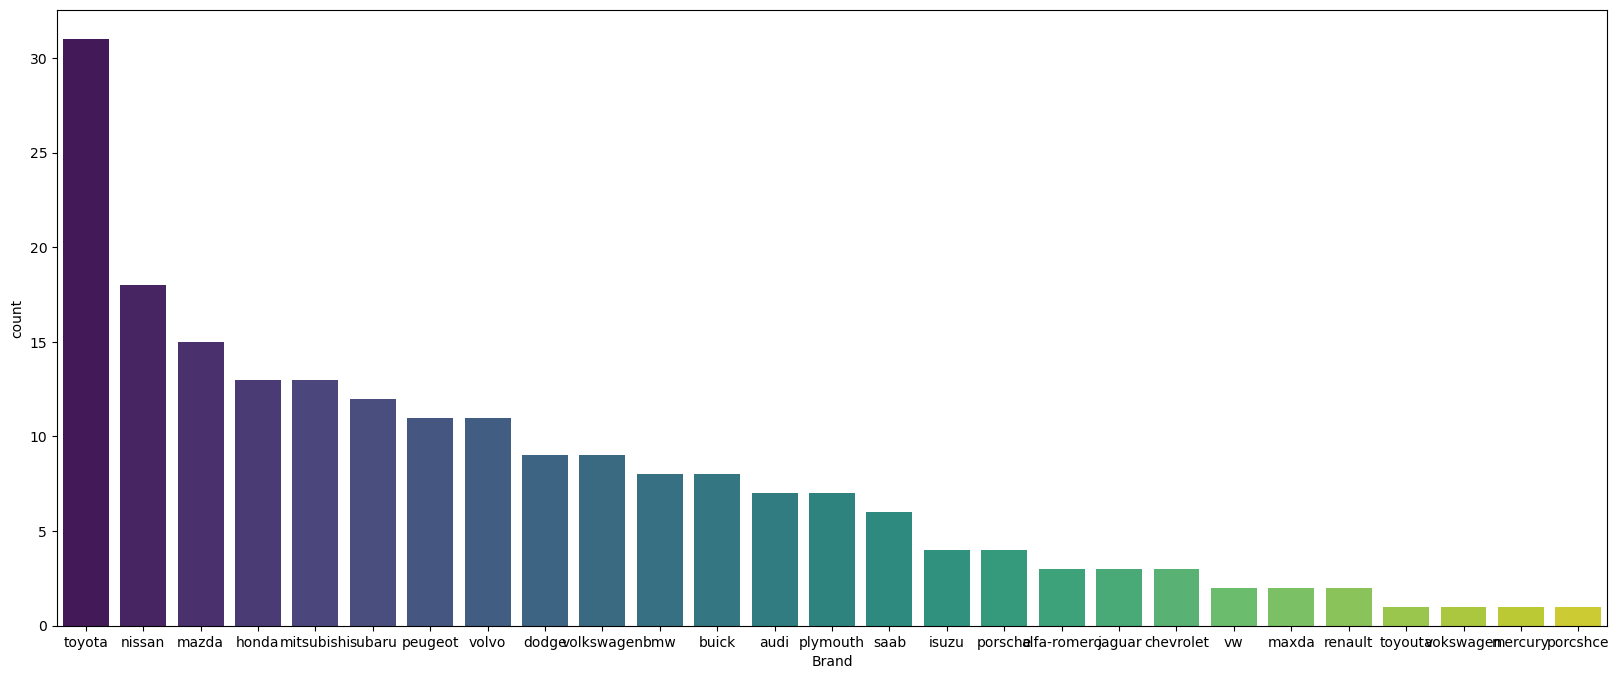

In [50]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='Brand',palette='viridis',order=df['Brand'].value_counts().index)

1) Toyota is the most prefered car.

2) Gas cars is prefered tha diesel.

3) Sedan cars are prefered than others.

4) Cars with four cylinders are prefered.

5) Cars with four doors are soled more than cars with two doors.

In [ ]:
categorical_col = [feature for feature in df.columns if df[feature].dtypes=='O']
categorical_col

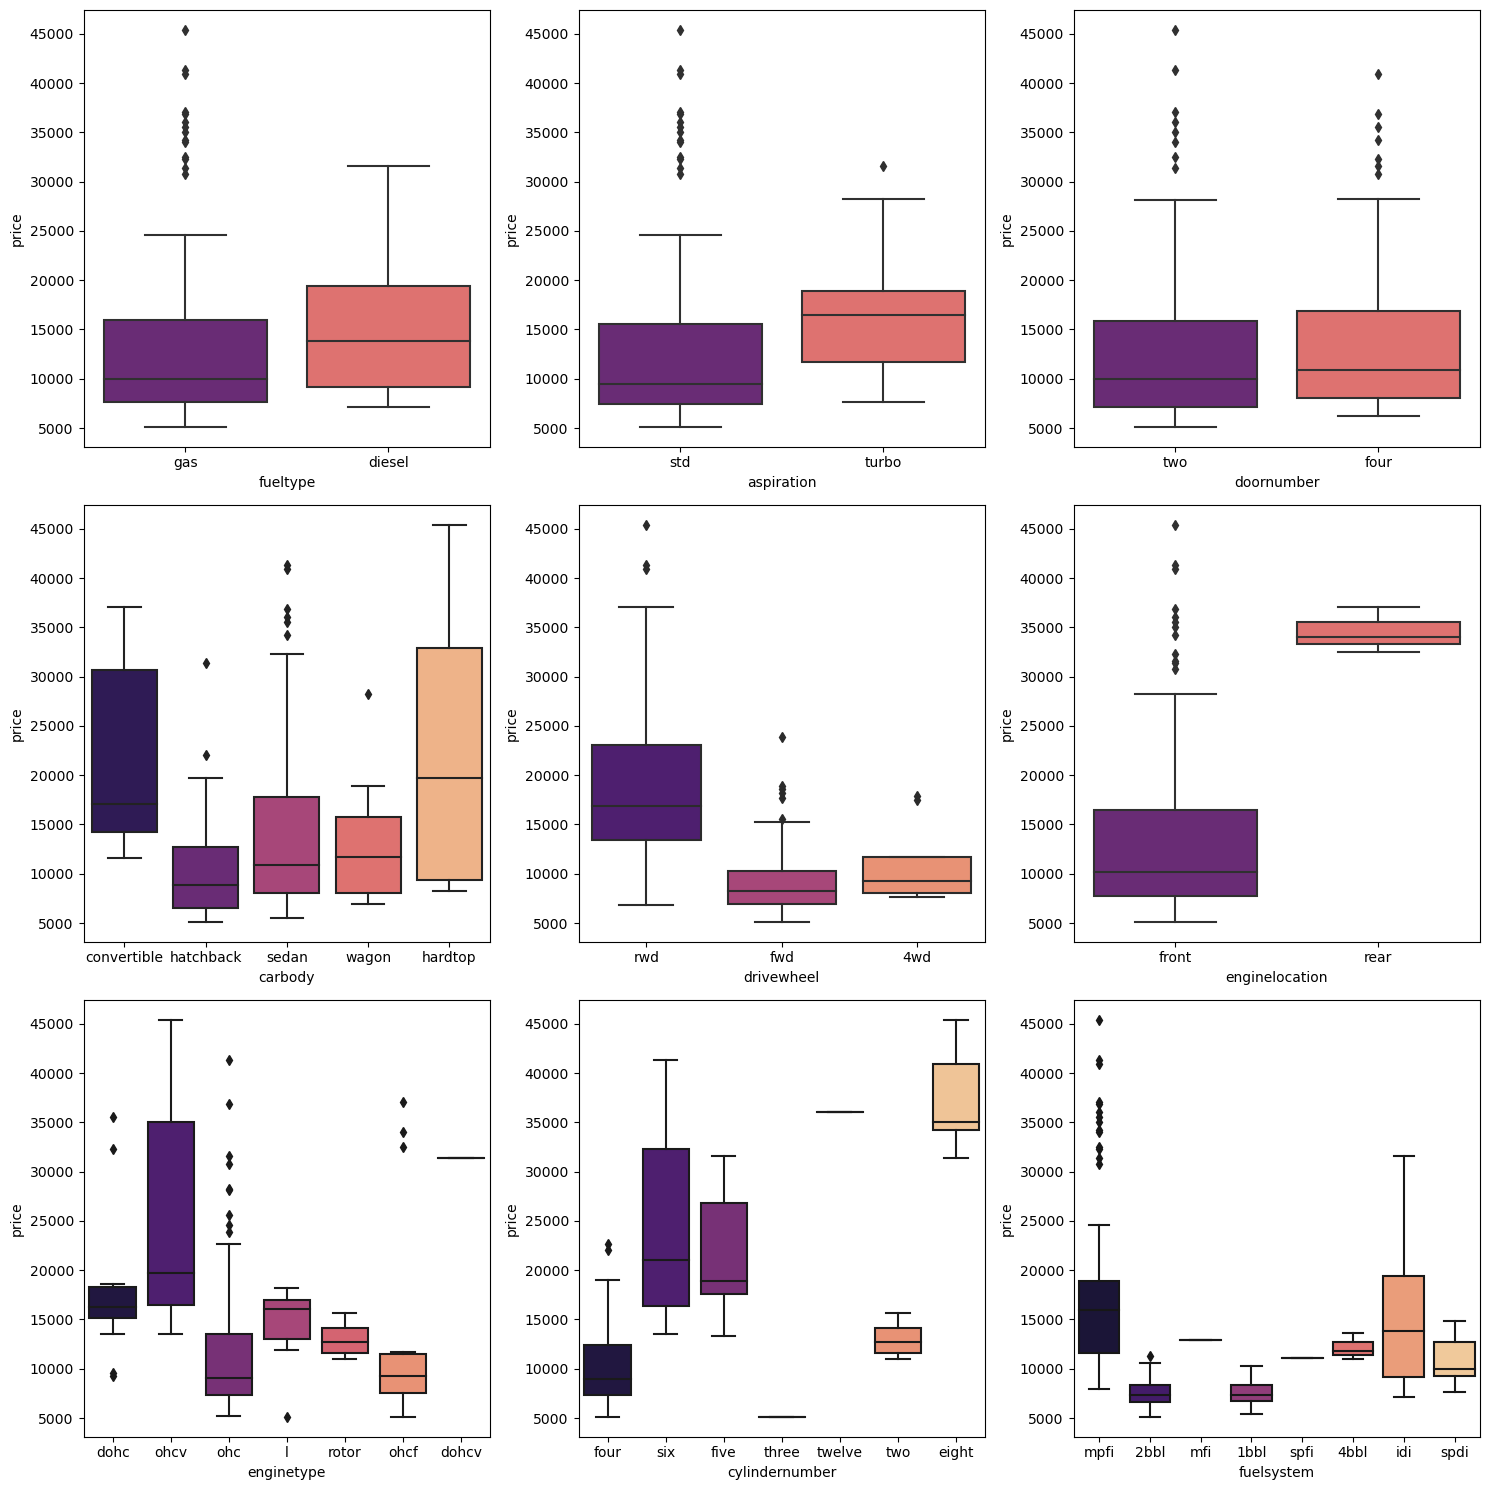

In [63]:
fig, axes = plt.subplots(3,3,figsize=(15,15))
axes = axes.flatten()
for i, col in enumerate(categorical_col):
    if col != 'Brand':
        sns.boxplot(data=df,x=col,y='price',palette='magma',ax=axes[i])
plt.tight_layout()
plt.show()

> From previous boxplots we can conclude that:

1) cars with diesel fuel syaytem are more expensive than gas cars.

2) Turbo cars price are higher than std ones.

3) Cars with four doors are slightly more expensive than cars with two doors.

4) Cars with rear engine location are more expensive than cars with fron engine location,beacuse most of luxury cars there engine is located at the back.

5) Cars with highest number of cylinders are more expensive.

6) ohcv engine type has the highest price range. 


Text(0.5, 1.0, 'Brand vs price')

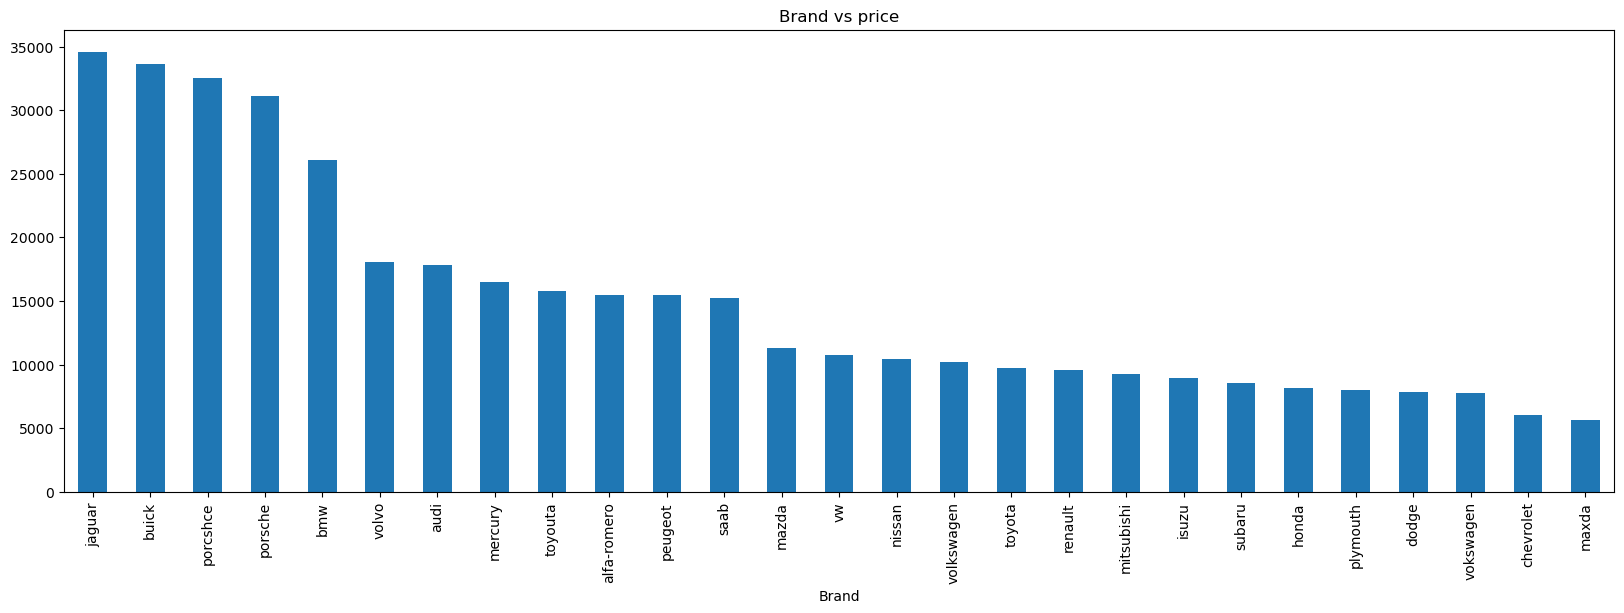

In [57]:
plt.figure(figsize=(20,6))
df.groupby('Brand')['price'].mean().sort_values(ascending=False).plot.bar()
plt.title('Brand vs price')

> We can see that the highest average price is represented by luxury brands like Jaguar,porsche which represent the lowest sales from the previous cahrt.


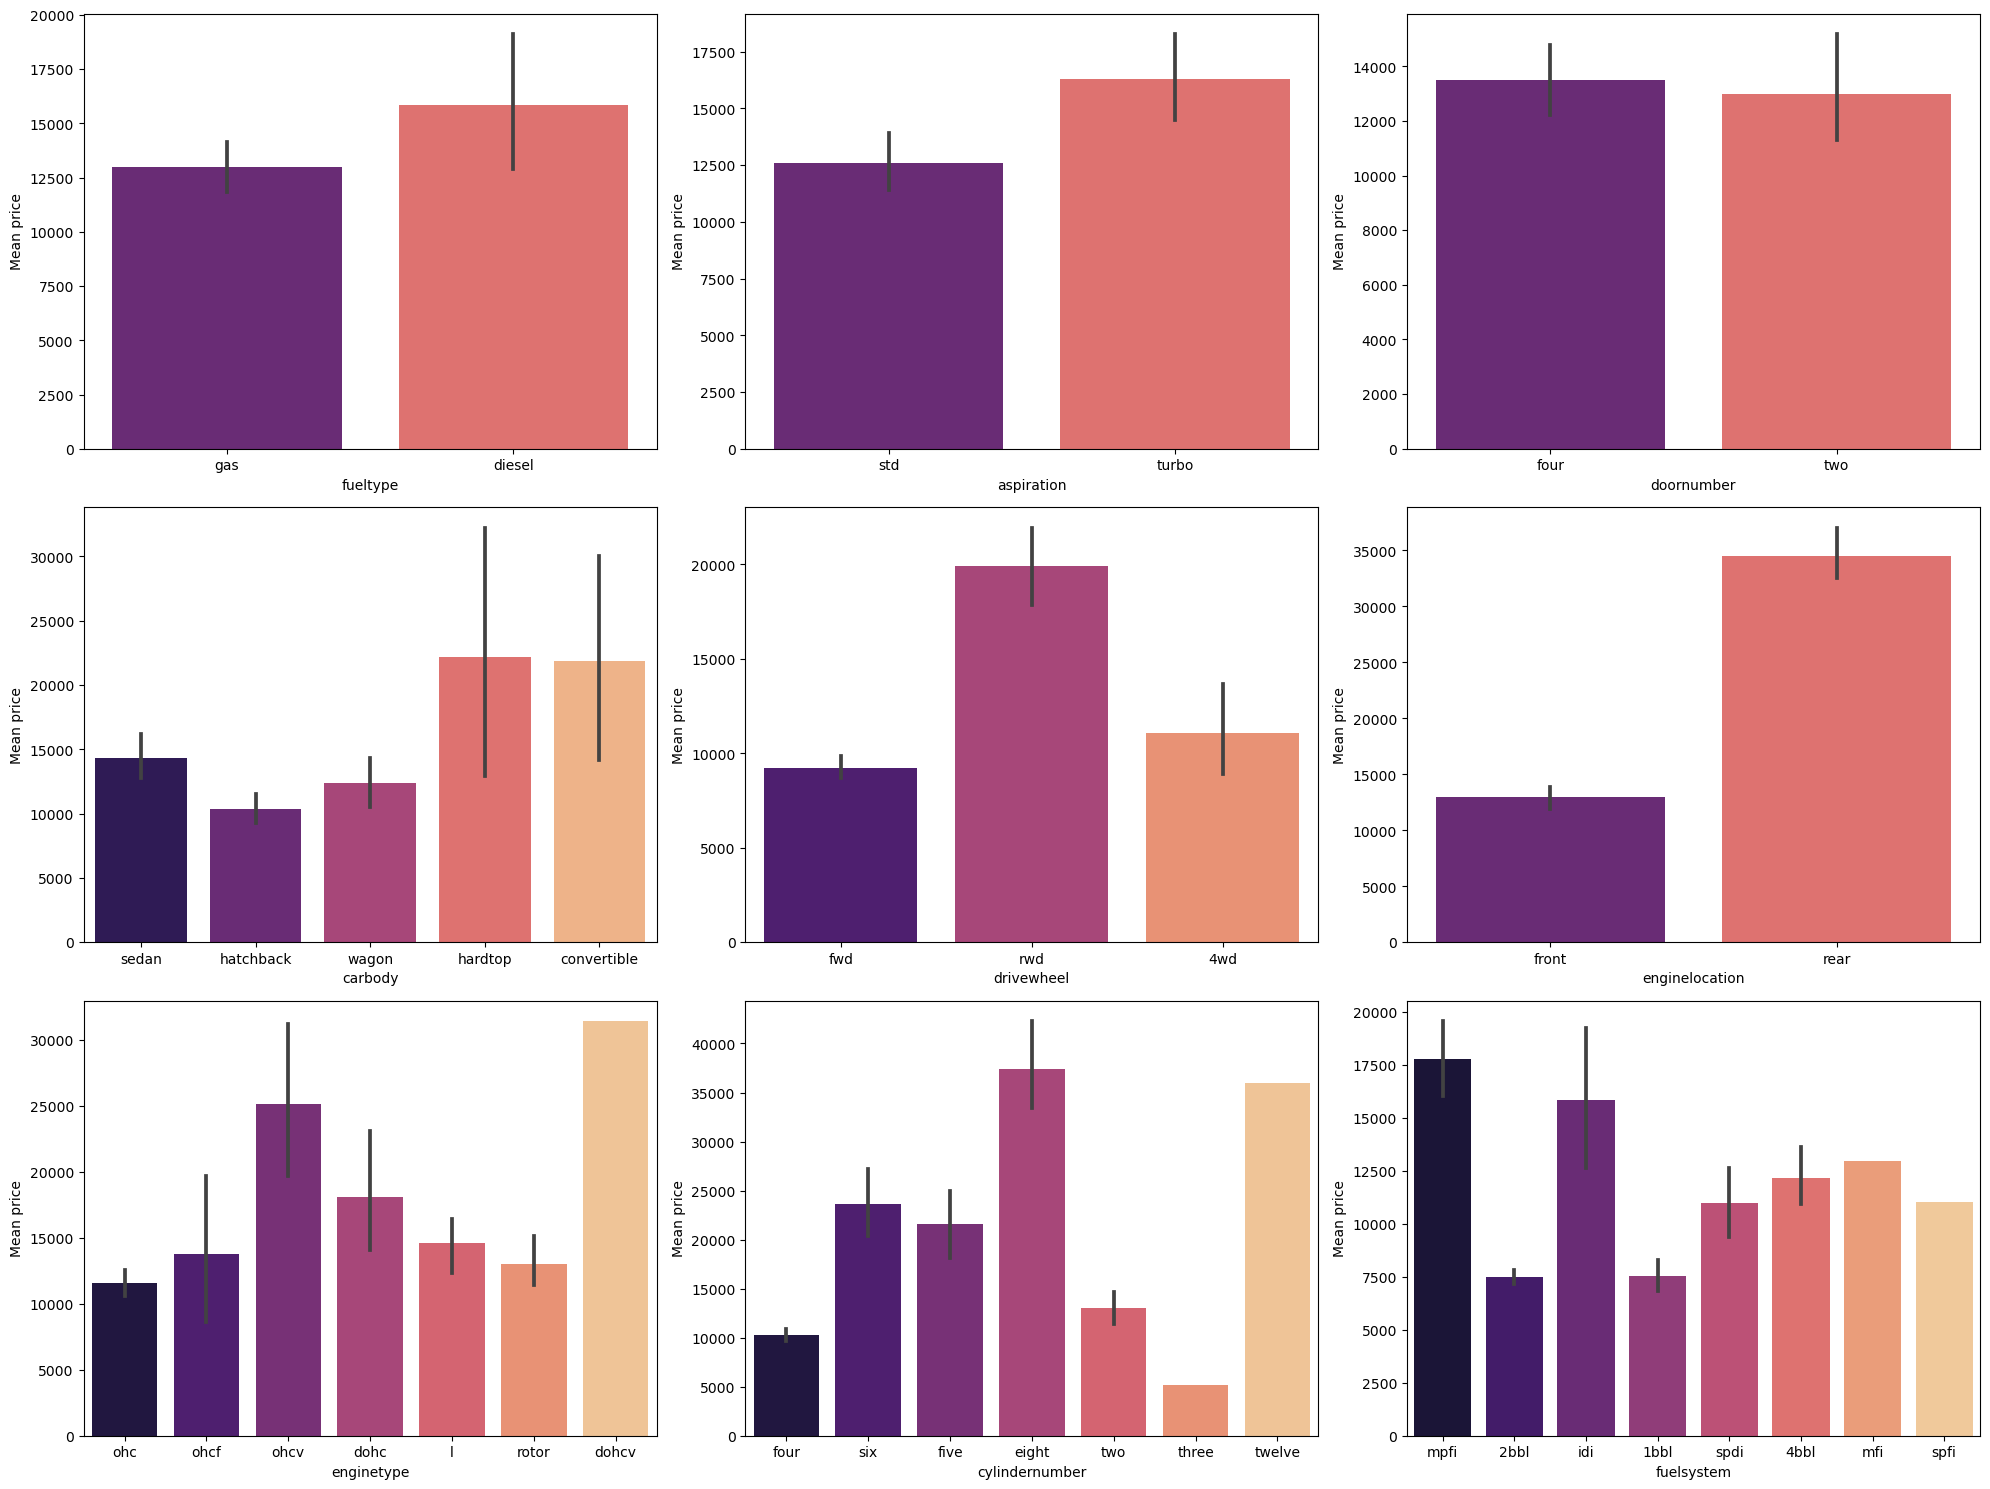

In [66]:
fig, axes = plt.subplots(3,3,figsize=(20,15))
axes = axes.flatten()
for i, col in enumerate(categorical_col):
    if col != 'Brand':
        sns.barplot(data=df,x=col,y='price',palette='magma',ax=axes[i],order=df[col].value_counts().index)
        axes[i].set_ylabel('Mean price')
plt.tight_layout()
plt.show()

### Numerical features

In [67]:
numerical_col = [feature for feature in df.columns if df[feature].dtypes!='O']
numerical_col

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

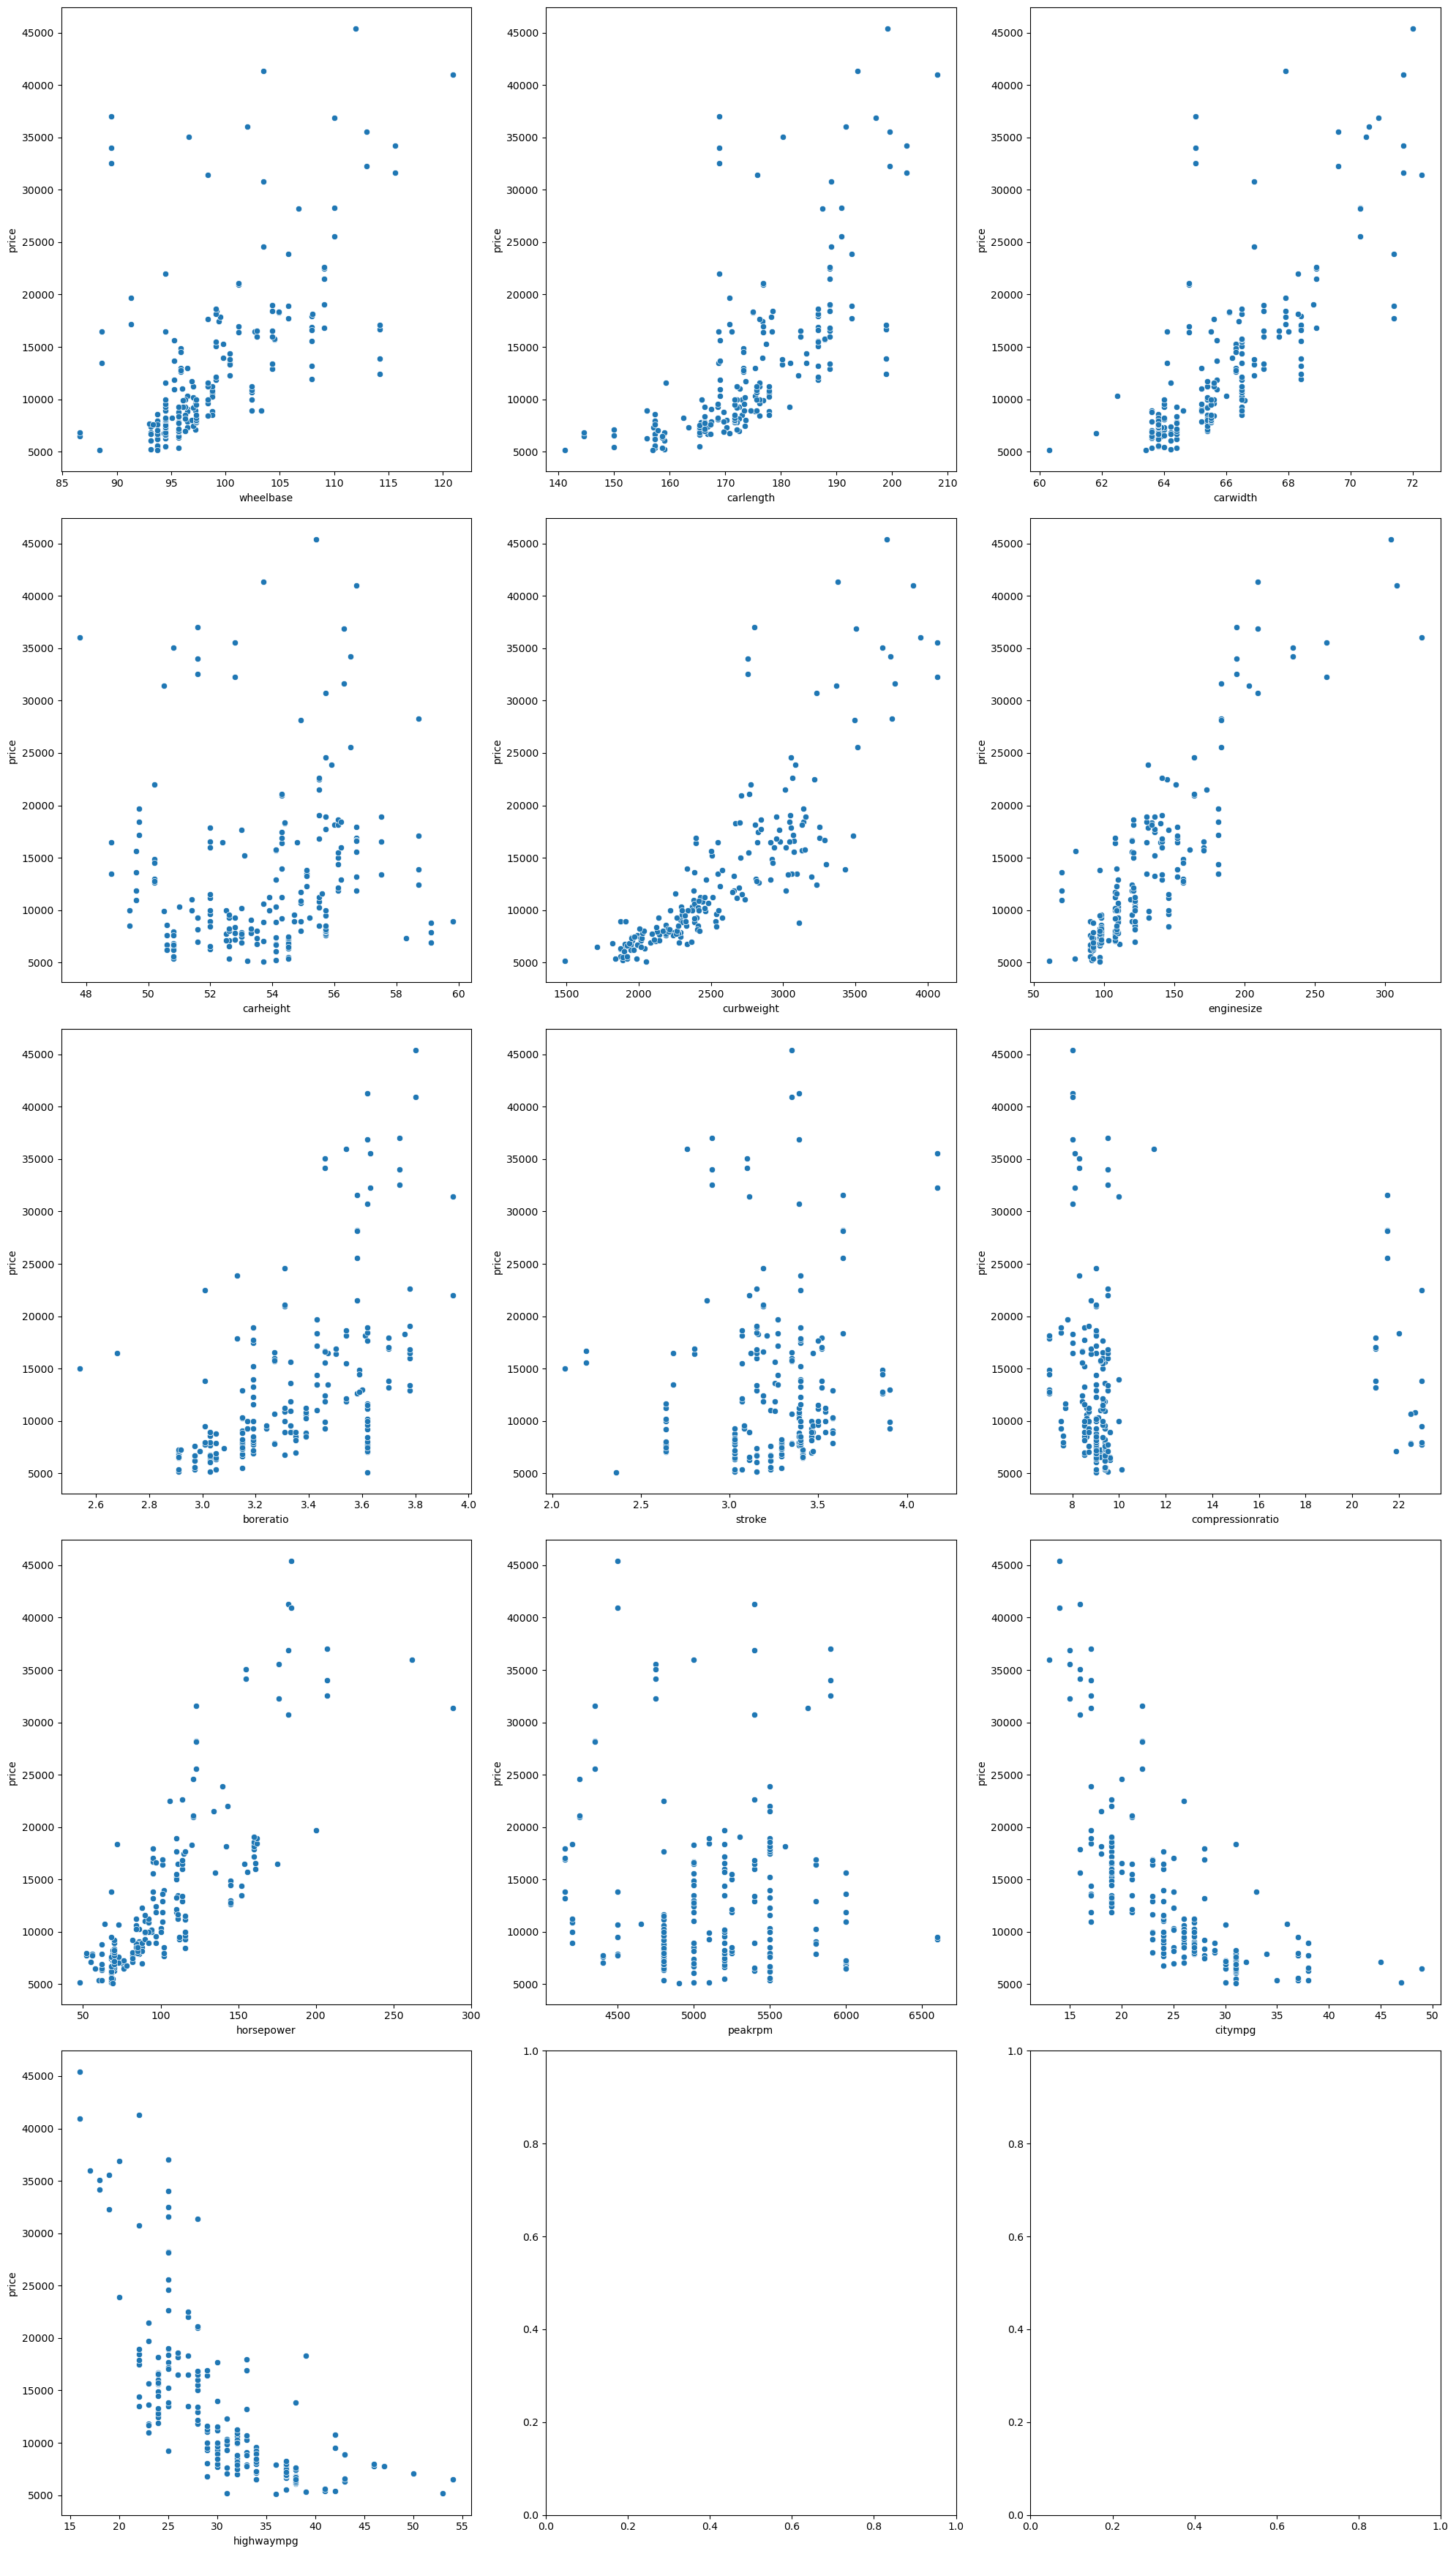

In [72]:
fig, axes = plt.subplots(5,3,figsize=(20,35))
axes = axes.flatten()
for i, col in enumerate(numerical_col):
    if col != 'price':
        sns.scatterplot(data=df,x=col,y='price',ax=axes[i])
        axes[i].set_ylabel('price')
plt.tight_layout()
plt.show()

1) carlenth,carwidth and curbweight seem to have positive correlation with price.

2) citympg,highwaympg seem to have significant negative correlation with price.

3) horsepower,enginesize,wheelbase and boreratio seem to have significant positive correlation.

## Feature engineering

In [73]:
for col in categorical_col:
    print(col,df[col].unique())

fueltype ['gas' 'diesel']
aspiration ['std' 'turbo']
doornumber ['two' 'four']
carbody ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel ['rwd' 'fwd' '4wd']
enginelocation ['front' 'rear']
enginetype ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Brand ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [74]:
# We will perform mean encoding which replace each category with mean price 
for col in categorical_col:
    means = df.groupby(col)['price'].mean()
    df[col] = df[col].map(means)

In [75]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,12999.7982,12611.270833,12989.924078,21890.500000,19910.809211,12961.097361,88.6,168.8,64.1,48.8,...,17754.60284,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.333333
1,12999.7982,12611.270833,12989.924078,21890.500000,19910.809211,12961.097361,88.6,168.8,64.1,48.8,...,17754.60284,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.333333
2,12999.7982,12611.270833,12989.924078,10376.652386,19910.809211,12961.097361,94.5,171.2,65.5,52.4,...,17754.60284,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.333333
3,12999.7982,12611.270833,13501.152174,14344.270833,9239.308333,12961.097361,99.8,176.6,66.2,54.3,...,17754.60284,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.166714
4,12999.7982,12611.270833,13501.152174,14344.270833,11087.463000,12961.097361,99.4,176.6,66.4,54.3,...,17754.60284,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.166714


In [76]:
# From EDA we saw that price column is right skewed hence, we will perform log tranformation
df['price'] = np.log(df['price'])

<Axes: >

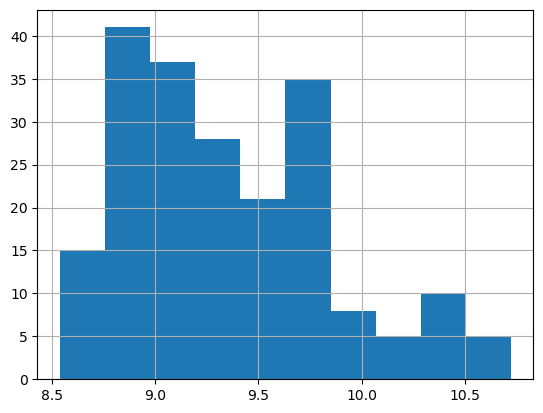

In [77]:
df['price'].hist()

In [78]:
# Divide tha data into X and y
X = df.drop('price',axis=1)
y = df['price']

## Feature scaling

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.32879797, -0.46929532, -1.13038833, ..., -0.64655303,
        -0.54605874,  0.30981023],
       [-0.32879797, -0.46929532, -1.13038833, ..., -0.64655303,
        -0.54605874,  0.30981023],
       [-0.32879797, -0.46929532, -1.13038833, ..., -0.95301169,
        -0.69162706,  0.30981023],
       ...,
       [-0.32879797, -0.46929532,  0.88465174, ..., -1.10624102,
        -1.12833203,  0.66748405],
       [ 3.04138127,  2.13085442,  0.88465174, ...,  0.11959362,
        -0.54605874,  0.66748405],
       [-0.32879797,  2.13085442,  0.88465174, ..., -0.95301169,
        -0.83719538,  0.66748405]])

## Feature selection

In [81]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [82]:
selectrd_features = SelectFromModel(Lasso(alpha=0.005,random_state=0))
selectrd_features.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [83]:
selectrd_features.get_support()

array([ True, False,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True])

In [84]:
selected_features = X.columns[selectrd_features.get_support()]
selected_features

Index(['fueltype', 'doornumber', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'Brand'],
      dtype='object')

In [85]:
print('Number of total features :{} features'.format(len(X.columns)))
print('Number of selected feature :{} features' .format(len(selected_features)))

Number of total features :23 features
Number of selected feature :15 features


In [86]:
X[selected_features].head()

,fueltype,doornumber,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,peakrpm,citympg,highwaympg,Brand
0,12999.7982,12989.924078,168.8,64.1,48.8,2548,18116.416667,10285.754717,130,17754.60284,111,5000,21,27,15498.333333
1,12999.7982,12989.924078,168.8,64.1,48.8,2548,18116.416667,10285.754717,130,17754.60284,111,5000,21,27,15498.333333
2,12999.7982,12989.924078,171.2,65.5,52.4,2823,25098.384615,23671.833333,152,17754.60284,154,5000,19,26,15498.333333
3,12999.7982,13501.152174,176.6,66.2,54.3,2337,11574.048426,10285.754717,109,17754.60284,102,5500,24,30,17859.166714
4,12999.7982,13501.152174,176.6,66.4,54.3,2824,11574.048426,21630.469727,136,17754.60284,115,5500,18,22,17859.166714


In [87]:
X = pd.DataFrame(X_scaled,columns=X.columns)
X

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Brand
0,-0.328798,-0.469295,-1.130388,2.905321,1.299340,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,...,0.074449,0.940087,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.309810
1,-0.328798,-0.469295,-1.130388,2.905321,1.299340,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,...,0.074449,0.940087,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.309810
2,-0.328798,-0.469295,-1.130388,-0.978153,1.299340,-0.121867,-0.708596,-0.231513,-0.190566,-0.543527,...,0.604046,0.940087,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.309810
3,-0.328798,-0.469295,0.884652,0.360074,-0.790757,-0.121867,0.173698,0.207256,0.136542,0.235942,...,-0.431076,0.940087,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.639034
4,-0.328798,-0.469295,0.884652,0.360074,-0.428781,-0.121867,0.107110,0.207256,0.230001,0.235942,...,0.218885,0.940087,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.639034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.328798,-0.469295,0.884652,0.360074,1.299340,-0.121867,1.721873,1.198549,1.398245,0.728239,...,0.339248,0.940087,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490,0.667484
201,-0.328798,2.130854,0.884652,0.360074,1.299340,-0.121867,1.721873,1.198549,1.351515,0.728239,...,0.339248,0.940087,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195,0.667484
202,-0.328798,-0.469295,0.884652,0.360074,1.299340,-0.121867,1.721873,1.198549,1.398245,0.728239,...,1.109571,0.940087,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332,0.667484
203,3.041381,2.130854,0.884652,0.360074,1.299340,-0.121867,1.721873,1.198549,1.398245,0.728239,...,0.435538,0.537748,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059,0.667484


In [88]:
X = X[selected_features]
X

,fueltype,doornumber,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,peakrpm,citympg,highwaympg,Brand
0,-0.328798,-1.130388,-0.426521,-0.844782,-2.020417,-0.014566,1.291052,-0.470742,0.074449,0.940087,0.174483,-0.262960,-0.646553,-0.546059,0.309810
1,-0.328798,-1.130388,-0.426521,-0.844782,-2.020417,-0.014566,1.291052,-0.470742,0.074449,0.940087,0.174483,-0.262960,-0.646553,-0.546059,0.309810
2,-0.328798,-1.130388,-0.231513,-0.190566,-0.543527,0.514882,3.153578,1.636073,0.604046,0.940087,1.264536,-0.262960,-0.953012,-0.691627,0.309810
3,-0.328798,0.884652,0.207256,0.136542,0.235942,-0.420797,-0.454206,-0.470742,-0.431076,0.940087,-0.053668,0.787855,-0.186865,-0.109354,0.639034
4,-0.328798,0.884652,0.207256,0.230001,0.235942,0.516807,-0.454206,1.314786,0.218885,0.940087,0.275883,0.787855,-1.106241,-1.273900,0.639034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.328798,0.884652,1.198549,1.398245,0.728239,0.763241,-0.454206,-0.470742,0.339248,0.940087,0.250533,0.577692,-0.340094,-0.400490,0.667484
201,-0.328798,0.884652,1.198549,1.351515,0.728239,0.949992,-0.454206,-0.470742,0.339248,0.940087,1.416637,0.367529,-0.953012,-0.837195,0.667484
202,-0.328798,0.884652,1.198549,1.398245,0.728239,0.878757,3.153578,1.636073,1.109571,0.940087,0.757535,0.787855,-1.106241,-1.128332,0.667484
203,3.041381,0.884652,1.198549,1.398245,0.728239,1.273437,-0.454206,1.636073,0.435538,0.537748,0.047732,-0.683286,0.119594,-0.546059,0.667484


## Model Building

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

### Model Evaluation

In [93]:
from sklearn.metrics import r2_score,mean_squared_error

In [94]:
print('R2 is :{}'.format(r2_score(y_test,pred)))
print('MSE is :{}'.format(mean_squared_error(y_test,pred)))
print('RMSE is {}'.format(np.sqrt(mean_squared_error(y_test,pred))))

R2 is :0.8899244188262757
MSE is :0.029866303515070722
RMSE is 0.1728187012885779


## Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
RF_model = RandomForestRegressor()
RF_model.fit(X_train,y_train)
predictions = RF_model.predict(X_test)

### Model evaluation

In [97]:
print('R2 is :{}'.format(r2_score(y_test,predictions)))
print('MSE is :{}'.format(mean_squared_error(y_test,predictions)))
print('RMSE is {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

R2 is :0.9500162232579125
MSE is :0.013561869318252278
RMSE is 0.11645543919565234


In [101]:
RF_model.feature_importances_

array([1.85461742e-04, 1.82500145e-03, 8.88425060e-03, 1.32397665e-02,
       4.69305053e-03, 5.39664975e-01, 7.37619310e-04, 3.24541221e-04,
       1.28139335e-01, 5.95187354e-03, 5.10670606e-02, 3.30423731e-03,
       7.07147735e-03, 1.20380648e-01, 1.14530701e-01])

In [103]:
best_features_rf = pd.DataFrame({'Feature':X_train.columns,'Values':RF_model.feature_importances_})
best_features_rf = best_features_rf.sort_values(by='Values',ascending=False)
best_features_rf

,Feature,Values
5,curbweight,0.539665
8,enginesize,0.128139
13,highwaympg,0.120381
14,Brand,0.114531
10,horsepower,0.051067
3,carwidth,0.013240
2,carlength,0.008884
12,citympg,0.007071
9,fuelsystem,0.005952
4,carheight,0.004693


## XGBOOST Regressor

In [98]:
from xgboost import XGBRegressor

In [99]:
Xgb_model = XGBRegressor()
Xgb_model.fit(X_train,y_train)
predictions = Xgb_model.predict(X_test)

### Model Evaluation

In [100]:
print('R2 is :{}'.format(r2_score(y_test,predictions)))
print('MSE is :{}'.format(mean_squared_error(y_test,predictions)))
print('RMSE is {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

R2 is :0.9418848415151574
MSE is :0.015768119901138123
RMSE is 0.12557117464266282


As we saw from previous three models, Random forest gaves us the best performance (The highest R2 and lowest RMSE) and through Random forest(feature_importance) we can see which independent variable affects the dependent variable more. Variables like curbweight,enginesize,highwaympg and Brand represents the most importanat features in Random forest.